# 1. Importing The Necessary libraries


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


%matplotlib inline

# 2. Importing my Data Set

In [ ]:
# I'm using this cell of code to access the data file in the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head(5)

,Unnamed: 0,id,application_type,home_ownership,loan_status,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,fico_range_low,fico_range_high,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75
0,0,113924213,Individual,RENT,Fully Paid,35000,0.1505,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,680,684,10,w,43573.779596,35000.00,8573.78,22049,9213.0,22800,46565,22049,18700,23765,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,1,4,5,4,4,2,5,6,5,7,1,80.0,0.0
1,3,115053799,Individual,RENT,Fully Paid,16000,0.1903,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,670,674,34,w,20685.951468,16000.00,4685.95,43001,22068.0,24100,53705,43001,24100,29605,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,8,8,8,20,4,8,27,8,10,2,95.7,75.0
2,7,116871315,Individual,MORTGAGE,Fully Paid,16000,0.2000,423.91,D,38400.0,Verified,debt_consolidation,N,31.93,0,660,664,36,w,21919.903154,16000.00,5919.90,52467,24451.0,46500,94156,52467,34400,47656,8.0,5.0,11.0,64.0,146.0,111,8,8,2.0,1.0,7.0,51.0,70.5,56.0,0.602,3.0,5.0,5573.0,3498.0,10161.0,0.00,2,8,10,9,9,19,13,16,10,15,4,87.9,66.7
3,13,112840711,Individual,MORTGAGE,Fully Paid,5200,0.0944,166.43,B,115000.0,Not Verified,other,N,5.86,1,690,694,24,w,5678.094115,5200.00,478.09,75281,65426.0,28700,81495,75281,20700,50743,2.0,3.0,12.0,18.0,161.0,203,1,1,3.0,1.0,1.0,98.0,21.9,47.0,0.312,5.0,6.0,3187.0,6273.0,16164.0,0.00,5,3,5,5,6,10,9,13,5,13,7,63.6,0.0
4,20,125174701,Individual,MORTGAGE,Charged Off,9575,0.1709,341.81,D,73000.0,Verified,home_improvement,N,30.97,0,710,714,36,w,4441.910000,2191.25,1208.67,77575,75968.0,11500,125139,77575,10000,113639,14.0,1.0,3.0,30.0,262.0,250,14,3,3.0,1.0,4.0,88.0,16.1,75.0,0.140,0.0,1.0,932.0,11082.0,8393.0,1041.99,4,2,2,3,13,18,4,18,2,7,1,86.1,0.0


In [ ]:
df.shape

(15848, 63)

# 3. loan_status
### let's create a new feature - loan_paid - that is 1 for 'Fully Paid' and 0 for 'Charged Off'

(15848, 63)


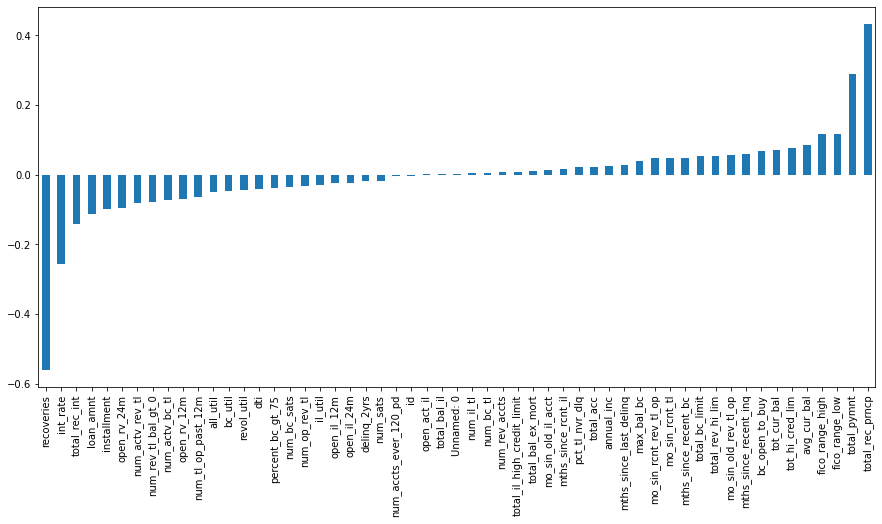

In [ ]:
values = df.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))
print(df.shape)
df['loan_paid'] = df['loan_status'].map(d)

df = df.drop(columns=['loan_status'])

# checking correlation of features to the new loan_paid column
plt.figure(figsize=(15,7))
new_corr = df.corr().iloc[:-1,-1].sort_values()
new_corr.plot.bar(rot=90)

In [ ]:
df.shape

(15848, 63)

# 4. Categorical Columns Preprocessing

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols]

,application_type,home_ownership,grade,verification_status,purpose,hardship_flag,initial_list_status
0,Individual,RENT,C,Verified,debt_consolidation,N,w
1,Individual,RENT,D,Source Verified,debt_consolidation,N,w
2,Individual,MORTGAGE,D,Verified,debt_consolidation,N,w
3,Individual,MORTGAGE,B,Not Verified,other,N,w
4,Individual,MORTGAGE,D,Verified,home_improvement,N,w
...,...,...,...,...,...,...,...
15843,Individual,OWN,C,Source Verified,debt_consolidation,N,w
15844,Individual,MORTGAGE,C,Verified,home_improvement,N,w
15845,Individual,MORTGAGE,C,Verified,medical,N,w
15846,Joint App,MORTGAGE,E,Not Verified,debt_consolidation,N,w


## 4.1 droping constant columns

In [ ]:
cols_to_drop = ['id', 'hardship_flag']
df = df.drop(columns=cols_to_drop)
df.shape

(15848, 61)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols]

,application_type,home_ownership,grade,verification_status,purpose,initial_list_status
0,Individual,RENT,C,Verified,debt_consolidation,w
1,Individual,RENT,D,Source Verified,debt_consolidation,w
2,Individual,MORTGAGE,D,Verified,debt_consolidation,w
3,Individual,MORTGAGE,B,Not Verified,other,w
4,Individual,MORTGAGE,D,Verified,home_improvement,w
...,...,...,...,...,...,...
15843,Individual,OWN,C,Source Verified,debt_consolidation,w
15844,Individual,MORTGAGE,C,Verified,home_improvement,w
15845,Individual,MORTGAGE,C,Verified,medical,w
15846,Joint App,MORTGAGE,E,Not Verified,debt_consolidation,w


##  4.2 Investigate Categorical Data

In [ ]:
print('++++++++++++++++ application_type unique values +++++++++++++++++++')
print(df.application_type.value_counts())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('++++++++++++++++ home_ownership unique values +++++++++++++++++++')
print(df.home_ownership.value_counts())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('++++++++++++++++ grade unique values +++++++++++++++++++')
print(df.grade.value_counts())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('++++++++++++++++ verification_status unique values +++++++++++++++++++')
print(df.verification_status.value_counts())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('++++++++++++++++ purpose unique values +++++++++++++++++++')
print(df.purpose.value_counts())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('++++++++++++++++ initial_list_statu unique values +++++++++++++++++++')
print(df.initial_list_status.value_counts())

++++++++++++++++ application_type unique values +++++++++++++++++++
Individual    14174
Joint App      1674
Name: application_type, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++ home_ownership unique values +++++++++++++++++++
MORTGAGE    8251
RENT        5813
OWN         1782
NONE           1
ANY            1
Name: home_ownership, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++ grade unique values +++++++++++++++++++
C    5497
B    4591
D    2344
A    2182
E     826
F     219
G     189
Name: grade, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++ verification_status unique values +++++++++++++++++++
Source Verified    6378
Not Verified       5521
Verified           3949
Name: verification_status, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++ purpose unique values +++++++++++++++++++
de

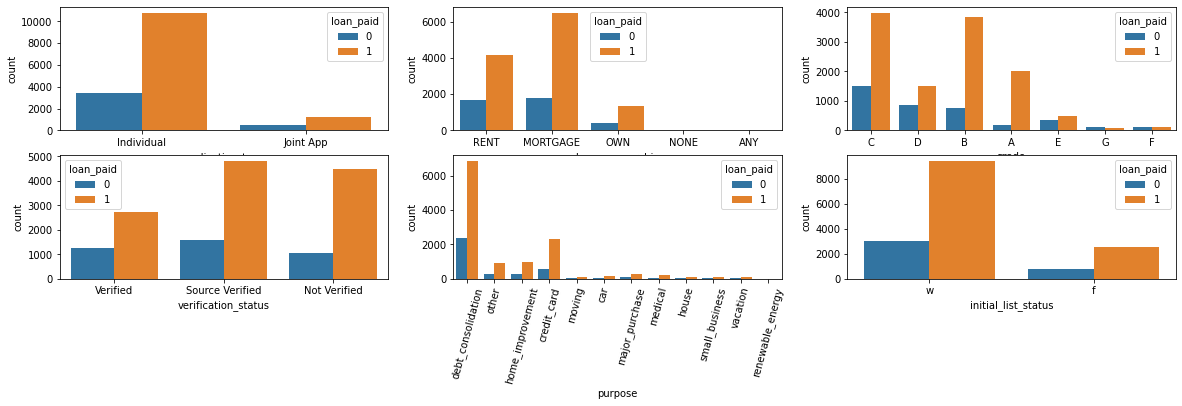

In [ ]:
# checking count per grade and loan_paid
plt.figure(figsize = [20, 5]) 


plt.subplot(2, 3, 1)
sns.countplot(x=df.application_type, hue=df.loan_paid);

plt.subplot(2, 3, 2)
sns.countplot(x=df.home_ownership, hue=df.loan_paid);
	
plt.subplot(2, 3, 3)
sns.countplot(x=df.grade, hue=df.loan_paid);
	
plt.subplot(2, 3, 4)
sns.countplot(x=df.verification_status, hue=df.loan_paid);
	 
plt.subplot(2, 3, 5)
sns.countplot(x=df.purpose, hue=df.loan_paid);
plt.xticks(rotation=75) 
	
plt.subplot(2, 3, 6)
sns.countplot(x=df.initial_list_status, hue=df.loan_paid);
	 
plt.show()

### From the above chart: columns such as ['NONE' , 'ANY' , 'renewable_energy'] have no impact to the loan so i will drop them

## 4.3 Create Dummy Variables

In [ ]:
# for these columns, let's just create dummy variables,
# concatenate them with the original dataframe and drop original columns.
		
df = pd.get_dummies(df, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['grade'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)

KeyError: ignored

In [ ]:
df.shape

(15848, 78)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index([], dtype='object')


In [ ]:
df.head(2)

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,total_acc,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,loan_paid,Joint App,MORTGAGE,OWN,RENT,B,C,D,E,F,G,Source Verified,Verified,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,w
0,0,35000,0.1505,1214.15,110000.0,9.13,0,680,684,10,43573.779596,35000.0,8573.78,22049,9213.0,22800,46565,22049,18700,23765,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.0,1,4,5,4,4,2,5,6,5,7,1,80.0,0.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,3,16000,0.1903,586.74,58000.0,29.05,0,670,674,34,20685.951468,16000.0,4685.95,43001,22068.0,24100,53705,43001,24100,29605,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.0,0,8,8,8,20,4,8,27,8,10,2,95.7,75.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(['NONE' , 'renewable_energy'], axis=1 , inplace=True)
df.shape

KeyError: ignored

# Finally, I will save the Last Modified Data Set
#### This data is ready for Machine Learning Process
#### I will save this data under the name of : FinData


In [ ]:
# This line saves the data-set in the google drive
df.to_csv('FinData.csv')
!cp FinData.csv "drive/My Drive/"